# 作業
在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以Titanic_train.csv 中，首先將有遺失值的數值刪除，並回答下列問題。

Q1: 透過數值法計算 Age 和 Survived 是否有相關性?
Q2:透過數值法計算 Sex 和 Survived 是否有相關性?
Q3: 透過數值法計算 Age 和 Fare 是否有相關性?
提示:
1.產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態
2.把題目中的 Survived 用 Survived_cate 來做分析
3.首先觀察一下這些變數的資料型態後，再來想要以哪一種判斷倆倆的相關性。

In [1]:
!pip install pingouin

Processing c:\users\user\appdata\local\pip\cache\wheels\61\fe\b5\340c9d5290780d6eafcf38988adbb46f82df2301ef7a0996ea\pingouin-0.5.0-py3-none-any.whl
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached outdated-0.2.1-py3-none-any.whl (7.5 kB)
  Using cached pandas_flavor-0.2.0-py2.py3-none-any.whl (6.6 kB)
Processing c:\users\user\appdata\local\pip\cache\wheels\6a\33\c4\0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a\littleutils-0.2.2-py3-none-any.whl
  Using cached xarray-0.20.2-py3-none-any.whl (845 kB)


In [2]:
import pingouin as pg

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

In [7]:
!pip install researchpy

In [8]:
import researchpy

# 讀資料

In [9]:
df_train = pd.read_csv("Titanic_train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [10]:
df_train['Survived_cate'] = df_train['Survived']
df_train['Survived_cate'] = df_train['Survived_cate'].astype('object')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Survived_cate  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [11]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_cate
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


# Q1: 透過數值法計算 Age 和 Survived 是否有相關性?

In [13]:
# Use Eta squared
aov = pg.anova(dv = 'Age', between = 'Survived', data = df_train, detailed = True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Survived,897.187582,1,897.187582,4.271195,0.039125,0.005963
1,Within,149559.448362,712,210.055405,NaN,NaN,NaN


In [14]:
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
etaSq

0.0059630974469252

In [15]:
def judgment_etaSq(etaSq):
    if etaSq < .01:
        qual = 'Negligible'
    elif etaSq < .06:
        qual = 'Small'
    elif etaSq < .14:
        qual = 'Medium'
    else:
        qual = 'Large'
    return(qual)
judgment_etaSq(etaSq)

'Negligible'

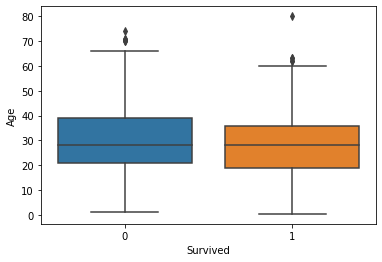

In [16]:
sns.boxplot(data = df_train, x = 'Survived', y = 'Age')
plt.show()

# Q2:透過數值法計算 Sex 和 Survived 是否有相關性?

In [17]:
# Use Cramer's V
contTable = pd.crosstab(df_train['Sex'], df_train['Survived'])
contTable

Survived,0,1
Sex,,
female,81,233
male,468,109


In [18]:
dof = min(contTable.shape[0], contTable.shape[1]) - 1
dof

1

In [19]:
crosstab, res = researchpy.crosstab(df_train['Sex'], df_train['Survived'], test = 'chi-square')
print("Cramer's value is", res.loc[2 ,'results'])

Cramer's value is 0.5434


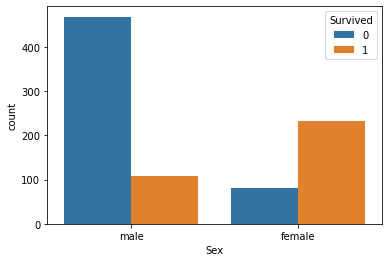

In [20]:
sns.countplot(data = df_train, x = 'Sex', hue = 'Survived')
plt.show()

# Q3: 透過數值法計算 Age 和 Fare 是否有相關性?

In [21]:
df_train = df_train[['Age', 'Fare']].dropna()

In [22]:
corr, _ = stats.pearsonr(df_train['Age'], df_train['Fare'])
corr

0.09606669176903891

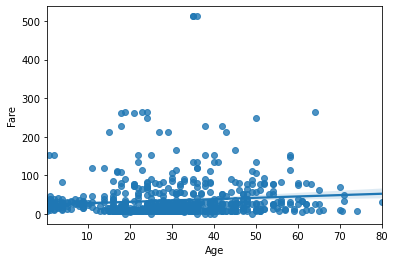

In [23]:
sns.regplot(data = df_train, x = 'Age', y = 'Fare')
plt.show()